In [52]:
import pandas as pd

# Load the dataset from the Google Sheets link
df = pd.read_csv("Applications_for_Machine_Learning_internship_edited.xlsx - Sheet1.csv")

      Name  Python (out of 3)  Machine Learning (out of 3)  \
0      NaN                  1                            0   
1      NaN                  2                            0   
2      NaN                  2                            2   
3      NaN                  3                            2   
4      NaN                  2                            2   
...    ...                ...                          ...   
1131   NaN                  2                            2   
1132   NaN                  3                            3   
1133   NaN                  3                            1   
1134   NaN                  2                            1   
1135   NaN                  2                            0   

      Natural Language Processing (NLP) (out of 3)  Deep Learning (out of 3)  \
0                                                0                         1   
1                                                0                         0   
2              

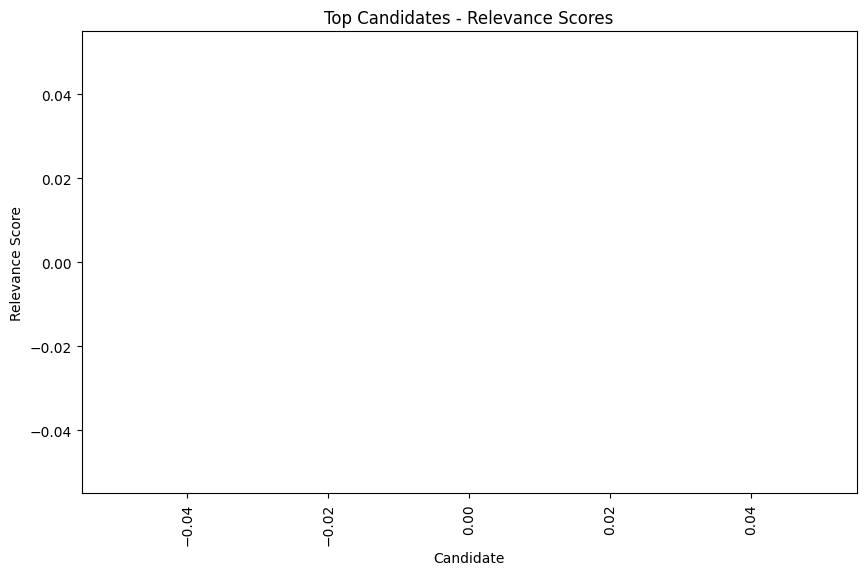

In [53]:
print(df)
import matplotlib.pyplot as plt

# Visualize the relevance scores of the top candidates
plt.figure(figsize=(10, 6))
plt.bar(top_candidates["Name"], top_candidates["RelevanceScore"])
plt.xticks(rotation=90)
plt.xlabel("Candidate")
plt.ylabel("Relevance Score")
plt.title("Top Candidates - Relevance Scores")
plt.show()

In [54]:
# Verify the column names
print(df.columns)

Index(['Name', 'Python (out of 3)', 'Machine Learning (out of 3)',
       'Natural Language Processing (NLP) (out of 3)',
       'Deep Learning (out of 3)', 'Other skills',
       'Are you available for 3 months, starting immediately, for a full-time work from home internship? ',
       'Degree', 'Stream', 'Current Year Of Graduation', 'Performance_PG',
       'Performance_UG', 'Performance_12', 'Performance_10'],
      dtype='object')


In [55]:
# Drop rows with NaN values in any column except "Name"
df = df.dropna(subset=df.columns[df.columns != 'Name'])


In [56]:
# Drop rows where the specified column does not start with "Yes"
df = df[df["Are you available for 3 months, starting immediately, for a full-time work from home internship? "].str.startswith("Yes")]


In [57]:
print(df)

      Name  Python (out of 3)  Machine Learning (out of 3)  \
10     NaN                  2                            0   
18     NaN                  0                            2   
29     NaN                  2                            2   
72     NaN                  1                            0   
120    NaN                  2                            2   
184    NaN                  2                            2   
220    NaN                  2                            1   
246    NaN                  3                            3   
261    NaN                  0                            0   
285    NaN                  2                            2   
359    NaN                  3                            3   
406    NaN                  3                            3   
421    NaN                  3                            3   
434    NaN                  2                            0   
586    NaN                  2                            3   
671    N

In [58]:
# Define the criteria for filtering resumes
required_degree = "Bachelor's Degree"
required_skills = ["Python", "Data Analysis", "Machine Learning", "Statistics"]
minimum_experience = 1

# Convert "Performance_UG" column to numeric
df["Performance_UG"] = pd.to_numeric(df["Performance_UG"], errors='coerce')

# Filter resumes based on the defined criteria
filtered_resumes = df[
    (df["Degree"] == required_degree) &
    (df["Other skills"].str.contains("|".join(required_skills))) &
    (df["Performance_UG"] >= minimum_experience)
]

In [59]:
# Apply a scoring system to rank the filtered resumes
filtered_resumes["RelevanceScore"] = filtered_resumes["Other skills"].apply(
    lambda skills: sum(skill in skills for skill in required_skills)
)

# Sort the filtered resumes based on relevance scores in descending order
ranked_resumes = filtered_resumes.sort_values("RelevanceScore", ascending=False)

# Select the top candidates and move to the next phase
top_candidates = ranked_resumes.head(50)  # Select the top 50 candidates


In [60]:
# Print the details of the top candidates
for index, candidate in top_candidates.head(50).iterrows():
    print("Candidate Name:", candidate["Name"])
    print("Degree:", candidate["Degree"])
    print("Skills:", candidate["Other skills"])
    print("Experience (Performance_UG):", candidate["Performance_UG"])
    print("Relevance Score:", candidate["RelevanceScore"])
    print("-" * 30)


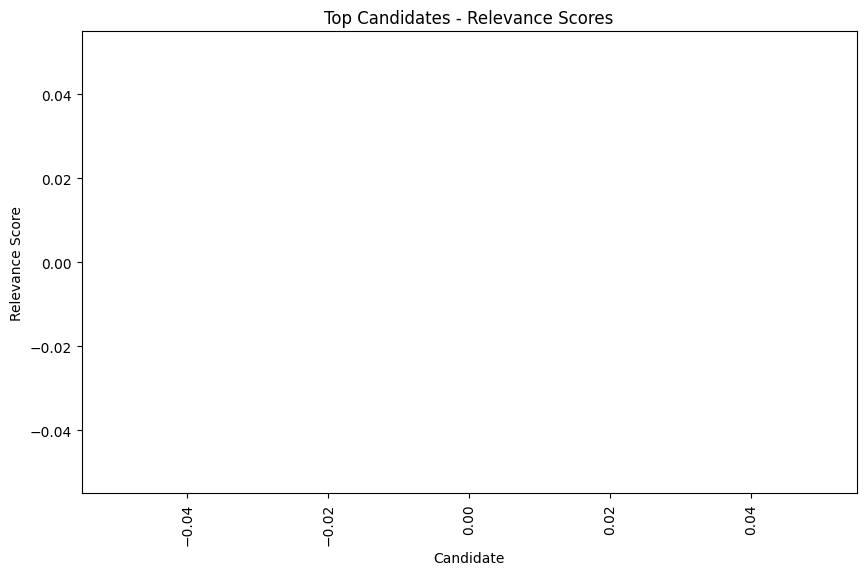

In [61]:
import matplotlib.pyplot as plt

# Visualize the relevance scores of the top candidates
plt.figure(figsize=(10, 6))
plt.bar(top_candidates["Name"], top_candidates["RelevanceScore"])
plt.xticks(rotation=90)
plt.xlabel("Candidate")
plt.ylabel("Relevance Score")
plt.title("Top Candidates - Relevance Scores")
plt.show()